In [209]:
import yfinance as yf
import pandas as pd
import garch
import datetime
import investpy
import statistics
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model 


In [186]:
##Gold, Equity ETF, and Bitcoin data importing for full 2020##
dfx1 = investpy.get_etf_historical_data(etf='Perth Mint Physical Gold', country='United States', from_date='01/01/2020', to_date='31/12/2020')
dfx2 = investpy.get_etf_historical_data(etf='Vanguard FTSE Developed Markets', country='United States', from_date='01/01/2020', to_date='31/12/2020')
dfx3 = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2020', to_date='31/12/2020')

##Gold, equity and bitcoin prices for Apr-Dec 2020##
df_gold = investpy.get_etf_historical_data(etf='Perth Mint Physical Gold', country='United States', from_date='01/04/2020', to_date='31/12/2020')
df_gold['Date1'] = df_gold.index
df_equity = investpy.get_etf_historical_data(etf='Vanguard FTSE Developed Markets', country='United States', from_date='01/04/2020', to_date='31/12/2020')
df_equity['Date1'] = df_equity.index
df_bitcoin = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/04/2020', to_date='31/12/2020')
df_bitcoin['Date1'] = df_bitcoin.index

##Gold, equity and bitcoin returns calculation##
df_gold['return'] = df_gold['Close'].pct_change()
df_equity['return'] = df_equity['Close'].pct_change()
df_bitcoin['return'] = df_bitcoin['Close'].pct_change()

In [187]:
##Calculation moving averages of close prices##
dfx1['SMA_20'] = dfx1.iloc[:,3].rolling(window=20).mean()
dfx1['Date1'] = dfx1.index
dfx1_gold = dfx1[['Date1', 'SMA_20']].copy()
dfx2['SMA_20'] = dfx2.iloc[:,3].rolling(window=20).mean()
dfx2['Date1'] = dfx2.index
dfx2_equity = dfx2[['Date1', 'SMA_20']].copy()
dfx3['SMA_20'] = dfx3.iloc[:,3].rolling(window=20).mean()
dfx3['Date1'] = dfx3.index
dfx3_bitcoin = dfx3[['Date1', 'SMA_20']].copy()

In [188]:
##making final dataframe to chart generation##
pd_gold = pd.merge(dfx1_gold, df_gold, on ='Date1', how ='inner')
pd_equity = pd.merge(dfx2_equity, df_equity, on ='Date1', how ='inner')
pd_bitcoin = pd.merge(dfx3_bitcoin, df_bitcoin, on ='Date1', how ='inner')

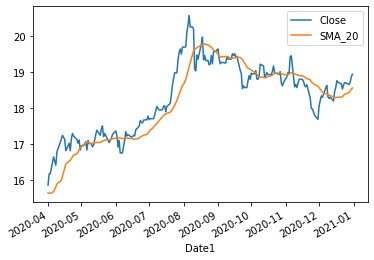

In [189]:
##graph for gold etf with moving average##
ax = plt.gca()
pd_gold.set_index('Date1').plot(kind='line',y=['Close', 'SMA_20'],ax=ax);
##We can see that before the start of September, gold was trading largely above its 20-DMA. Since September, equities started to go higher, which led to gold underperforming##


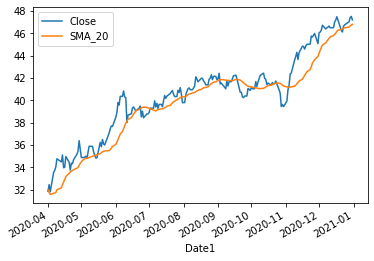

In [190]:
##graph for equity etf with moving average##
ax = plt.gca()
pd_equity.set_index('Date1').plot(kind='line',y=['Close', 'SMA_20'],ax=ax);
##We can see a sharp rebound in April and May after equities declined in March, where they traded well above their moving average. In the month of october/NOvember, equities consolidated and then resumed their move higher## 

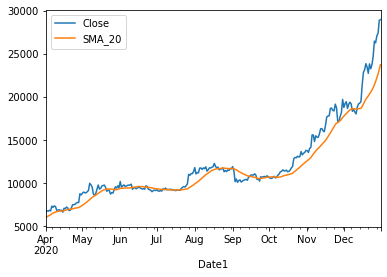

In [191]:
##graph for bitcoin with moving average##
ax = plt.gca()
pd_bitcoin.set_index('Date1').plot(kind='line',y=['Close', 'SMA_20'],ax=ax);
## We can see that bitcoin was moving along its moving average till october. From november, it started a strong move upward and is constantly trading well above its 20-DMA##

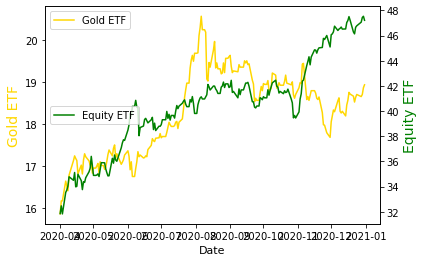

In [192]:
#equity and gold in 1 chart##
fig,ax = plt.subplots()
ax.plot(pd_gold.Date1, pd_gold.Close, color="gold", label = 'Gold ETF')
ax.set_xlabel("Date",fontsize=11)
ax.set_ylabel("Gold ETF",color="gold",fontsize=14)
plt.legend(loc="upper left")
ax2=ax.twinx()
ax2.plot(pd_equity.Date1, pd_equity.Close,color="green", label = 'Equity ETF')
ax2.set_ylabel("Equity ETF",color="green",fontsize=14)
plt.legend(loc="center left")
plt.show()

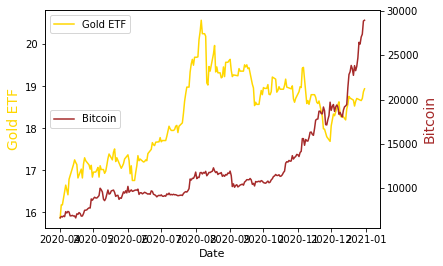

In [193]:
#gold and bitcoin in 1 chart##
fig,ax = plt.subplots()
ax.plot(pd_gold.Date1, pd_gold.Close, color="gold", label = 'Gold ETF')
ax.set_xlabel("Date",fontsize=11)
ax.set_ylabel("Gold ETF",color="gold",fontsize=14)
plt.legend(loc="upper left")
ax2=ax.twinx()
ax2.plot(pd_bitcoin.Date1, pd_bitcoin.Close,color="brown", label = 'Bitcoin')
ax2.set_ylabel("Bitcoin",color="brown",fontsize=14)
plt.legend(loc="center left")
plt.show()

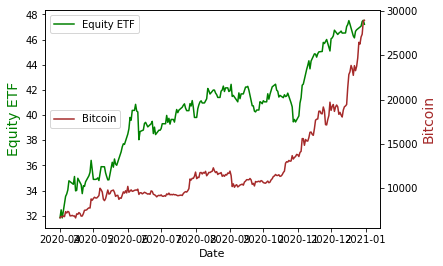

In [194]:
#equity and bitcoin in 1 chart##
fig,ax = plt.subplots()
ax.plot(pd_equity.Date1, pd_equity.Close, color="green", label = 'Equity ETF')
ax.set_xlabel("Date",fontsize=11)
ax.set_ylabel("Equity ETF",color="green",fontsize=14)
plt.legend(loc="upper left")
ax2=ax.twinx()
ax2.plot(pd_bitcoin.Date1, pd_bitcoin.Close,color="brown", label = 'Bitcoin')
ax2.set_ylabel("Bitcoin",color="brown",fontsize=14)
plt.legend(loc="center left")
plt.show()

In [207]:
##Fitting GARCH model in Gold ETF data for Q2, Q3 and Q4##
pd_gold['Date1'] = pd.to_datetime(pd_gold['Date1']).dt.date
pd_gold_Q2 = pd_gold.loc[(pd_gold['Date1'] >= datetime.date(2020, 4, 1)) & (pd_gold['Date1'] <= datetime.date(2020, 6, 30))]
returns = 100 * pd_gold_Q2['return'].dropna()
model_garch_1_1 = arch_model(returns, mean = 'Constant', vol = "GARCH", p=1, q=1)
res = model_garch_1_1.fit()
#print(res.summary())
pd_gold_Q3 = pd_gold.loc[(pd_gold['Date1'] >= datetime.date(2020, 7, 1)) & (pd_gold['Date1'] <= datetime.date(2020, 9, 30))]
returns = 100 * pd_gold_Q3['return'].dropna()
model_garch_1_1 = arch_model(returns, mean = 'Constant', vol = "GARCH", p=1, q=1)
res = model_garch_1_1.fit()
#print(res.summary())
pd_gold_Q4 = pd_gold.loc[(pd_gold['Date1'] >= datetime.date(2020, 10, 1)) & (pd_gold['Date1'] <= datetime.date(2020, 12, 31))]
returns = 100 * pd_gold_Q4['return'].dropna()
model_garch_1_1 = arch_model(returns, mean = 'Constant', vol = "GARCH", p=1, q=1)
res = model_garch_1_1.fit()
#print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 355733721.4553489
Iteration:      2,   Func. Count:     13,   Neg. LLF: 280412124.6244957
Iteration:      3,   Func. Count:     20,   Neg. LLF: 155.91902704838145
Iteration:      4,   Func. Count:     26,   Neg. LLF: 94.14219169752889
Iteration:      5,   Func. Count:     32,   Neg. LLF: 93.25050608026677
Iteration:      6,   Func. Count:     37,   Neg. LLF: 99.44505784680055
Iteration:      7,   Func. Count:     43,   Neg. LLF: 94.63982660742009
Iteration:      8,   Func. Count:     49,   Neg. LLF: 92.53292055965231
Iteration:      9,   Func. Count:     54,   Neg. LLF: 92.53010420676326
Iteration:     10,   Func. Count:     59,   Neg. LLF: 92.52426446067953
Iteration:     11,   Func. Count:     64,   Neg. LLF: 92.52389626728404
Iteration:     12,   Func. Count:     69,   Neg. LLF: 92.52387179735206
Iteration:     13,   Func. Count:     73,   Neg. LLF: 92.52387179663168
Optimization terminated successfully    (Exit mode 0)
         

In [212]:
returns = 100 * pd_gold_Q2['return'].dropna()
model_garchm = garch(returns, PQ = (1,1), poq = (1,0,1))
model_garchm.fit()

TypeError: 'module' object is not callable